In [1]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])).__str__)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[]


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11452160018721884818
xla_global_id: -1
]


In [ ]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt 


In [ ]:
tfds.image_classification.FashionMNIST.as_dataset

<function tensorflow_datasets.core.dataset_builder.DatasetBuilder.as_dataset(self, split: 'Optional[Tree[splits_lib.SplitArg]]' = None, *, batch_size: 'Optional[int]' = None, shuffle_files: 'bool' = False, decoders: 'Optional[TreeDict[decode.partial_decode.DecoderArg]]' = None, read_config: 'Optional[read_config_lib.ReadConfig]' = None, as_supervised: 'bool' = False)>

In [ ]:
dataset = tfds.load('fashion_mnist' , split = 'train')

In [ ]:
dataset

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [ ]:
dataset.as_numpy_iterator().next()['label']

2

In [ ]:
import numpy as np 
datatranslator = dataset.as_numpy_iterator()

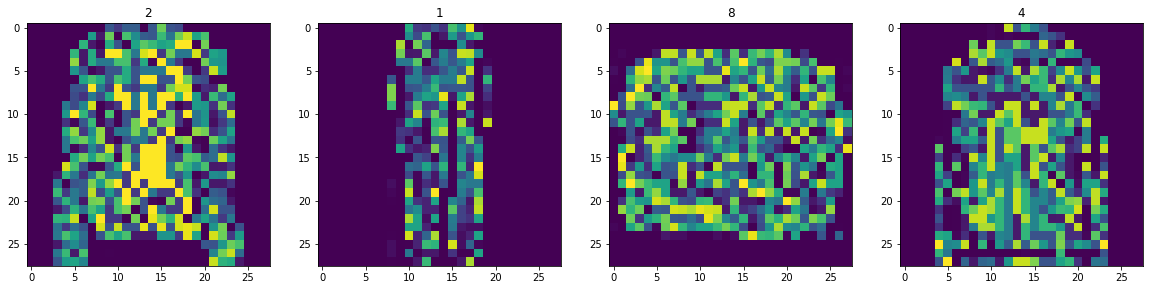

In [ ]:
fig , ax = plt.subplots(ncols = 4 , figsize = (20,20))
for i in range (4):
    batch = datatranslator.next()
    ax[i].imshow(np.square(batch['image']))
    ax[i].title.set_text(batch['label'])

In [ ]:
ax

array([<AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'4'}>], dtype=object)

In [ ]:
def scale_image(data):
    image = data['image']
    return image/255

In [ ]:
ds = tfds.load('fashion_mnist' , split='train')
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense  , Flatten , Dropout , LeakyReLU , Reshape , UpSampling2D 

In [ ]:
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128 ,  input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))


    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))



    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))


    model.add(Conv2D(1,4,padding='same' , activation='sigmoid'))

    
    return model 

In [ ]:
generator = build_generator()


In [ ]:
generator.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_137 (LeakyReLU)  (None, 6272)             0         
                                                                 
 reshape_13 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_26 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_138 (Conv2D)         (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_138 (LeakyReLU)  (None, 14, 14, 128)      0         
                                                     

In [ ]:

# img

(4, 28, 28, 1)


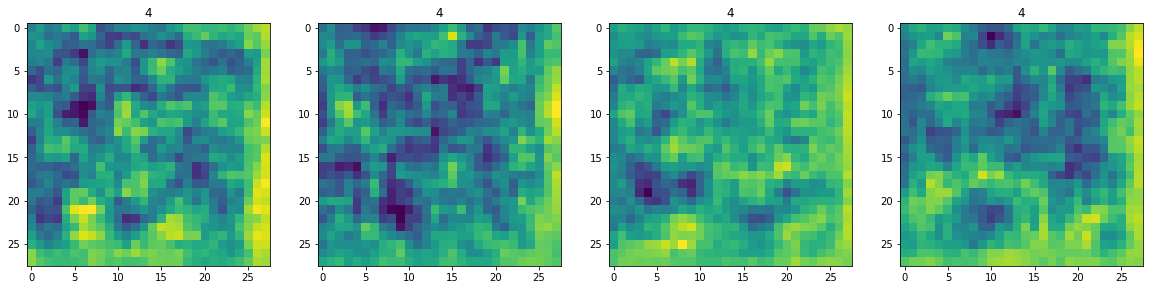

In [ ]:

img = generator.predict(np.random.randn(4,128,1))
print(img.shape)
fig , ax = plt.subplots(ncols = 4 , figsize = (20,20))
for i , img  in enumerate(img):

    ax[i].imshow(np.squeeze(img))
    ax[i].title.set_text(batch['label'])

In [ ]:
img.shape

(28, 28, 1)

# build the discrmator 

In [ ]:
def build_discrrminator():
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model


    
discrminator = build_discrrminator()
discrminator.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_143 (Conv2D)         (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_142 (LeakyReLU)  (None, 24, 24, 32)       0         
                                                                 
 dropout_88 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_144 (Conv2D)         (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_143 (LeakyReLU)  (None, 20, 20, 64)       0         
                                                                 
 dropout_89 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_145 (Conv2D)         (None, 16, 16, 128)     

In [ ]:
img.shape

(28, 28, 1)

In [ ]:
discrminator.predict(np.expand_dims(img , 0))

array([[0.49230772]], dtype=float32)

# setting up optimaizers and losses

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy



In [ ]:
opt_gen = Adam(learning_rate=.0001)
opt_dis = Adam(learning_rate=.00001)

loss_gen = BinaryCrossentropy() 
loss_dis  = BinaryCrossentropy()

In [ ]:
from tensorflow.keras.models import Model


In [ ]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
fashioGAN = FashionGAN(generator , discrminator)

In [ ]:
fashioGAN.compile(g_opt =opt_gen, d_opt = opt_dis, g_loss = loss_gen, d_loss = loss_dis )

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback


In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist = fashioGAN.fit(ds, epochs=20 , callbacks=[ModelMonitor()])

Epoch 1/20
  7/469 [..............................] - ETA: 1:05:03 - d_loss: 0.6961 - g_loss: 0.6864

KeyboardInterrupt: 